# BMO EDA 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gcp
import gcp.bigquery as bq

In [2]:
pd.options.display.max_columns = 999

## Method of payment to card balances

### Scenario Description

* This scenario purports to detect AML risks in which a money launder may be using money from hard-to-trace source to pay off credit card balance.
* Categorize the credit payments by the payment methods and look for unusual patterns, e.g. consistent or large usage of ACH by a domestic customer to pay off the credit card
* The following fields should be part of transaction data schema.

|Transaction Type|Credit_Debit_Flag|
|---|---|
|Payment|C (Credit)|
|Refund|C|
|Reversal|C|
|Award|C|
|Purchase|D (Debit)|
|Fee|D|
|Interest Charge|D|
|Penalty|D|

|Payment Method|
|---|
|Cash|
|Wire|
|ACH|
|Paper Check|
|e-Check|
|Online Transfer|
|Payment at ATM|

In [3]:
%%sql --module use_case_2

DEFINE QUERY trans_by_type_green
SELECT
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE == 'Use Case 2 - Green'
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type
ORDER BY
  num_trans DESC

DEFINE QUERY trans_by_type_yellow
SELECT
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE == 'Use Case 2 - Yellow'
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type
ORDER BY
  num_trans DESC

DEFINE QUERY trans_by_type_red
SELECT
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE == 'Use Case 2 - Red'
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type
ORDER BY
  num_trans DESC

DEFINE QUERY trans_by_type
SELECT
  USE_CASE as use_case,
  TRANSACTION_TYPE AS trans_type,
  COUNT(*) AS num_trans
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  REGEXP_MATCH(USE_CASE, 'Use Case 2')
  AND CREDIT_DEBIT == 'C'
GROUP BY
  trans_type, use_case
ORDER BY
  trans_type, use_case

In [4]:
%bigquery execute --query use_case_2.trans_by_type_green

trans_type,num_trans
Online Transfer,16329172
e-Check Check,16321869
ATM PaymentPaper Check,13991200
ACH Payment,6995617
Payment,5789629
Wire Payment,4665774
ACH PaymentCash Payment,2332970
Paper Check,2332869
ATM Payment,2332031
Cash Payment,2330893


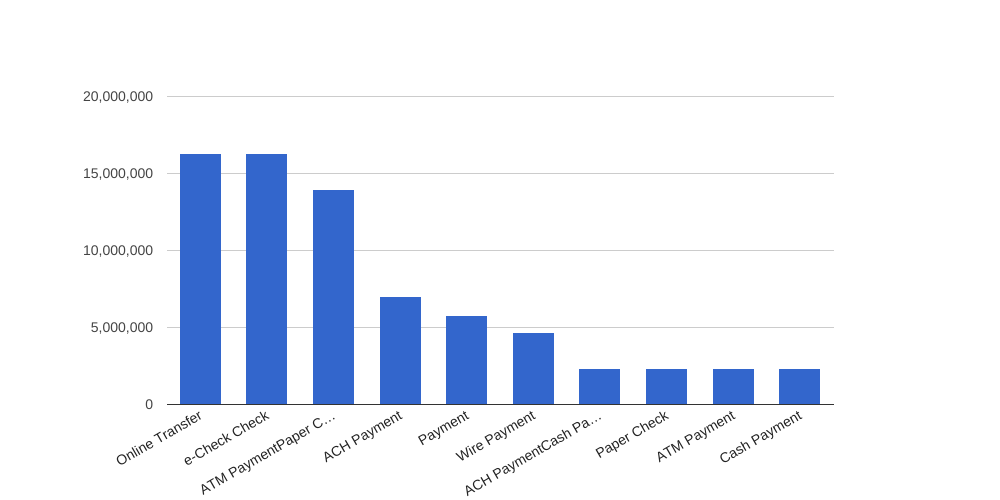

In [5]:
%%chart columns -d use_case_2.trans_by_type_green
height: 500
width: 1000
legend: none

In [6]:
%bigquery execute --query use_case_2.trans_by_type_yellow

trans_type,num_trans
e-Check Check,1291977
ACH Payment,1290448
Online Transfer,1287583
Wire Payment,859280
ATM PaymentPaper Check,858162
Payment,625110
ACH PaymentCash Payment,429694
Cash Payment,429398
ATM Payment,429245
Paper Check,429013


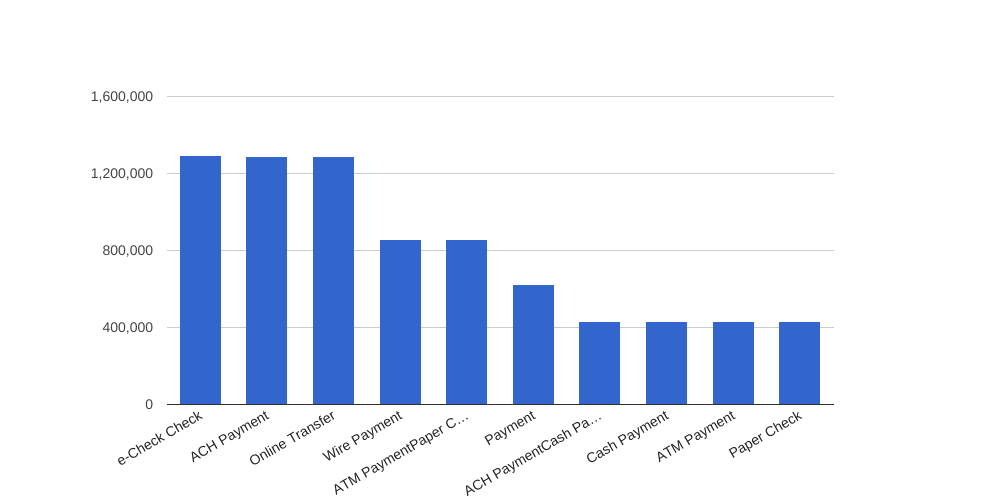

In [7]:
%%chart columns -d use_case_2.trans_by_type_yellow
height: 500
width: 1000
legend: none

In [8]:
%bigquery execute --query use_case_2.trans_by_type_red

trans_type,num_trans
ACH Payment,1126334
Wire Payment,753237
Cash Payment,376810
ATM Payment,376759
ACH PaymentCash Payment,376609
Paper Check,376196
Online Transfer,375450
e-Check Check,375418
Payment,353824


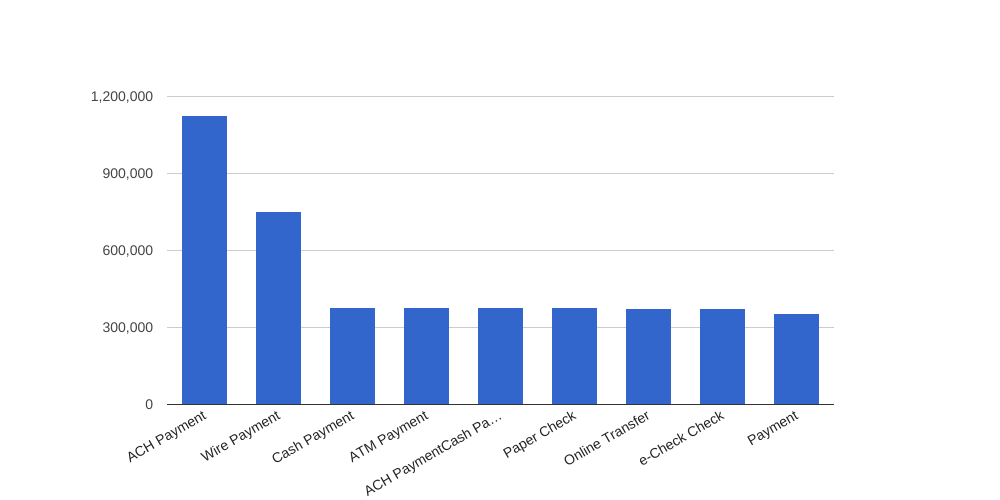

In [9]:
%%chart columns -d use_case_2.trans_by_type_red
height: 500
width: 1000
legend: none

In [10]:
%bigquery execute --query use_case_2.trans_by_type

use_case,trans_type,num_trans
Use Case 2 - Green,ACH Payment,6995617
Use Case 2 - Red,ACH Payment,1126334
Use Case 2 - Yellow,ACH Payment,1290448
Use Case 2 - Green,ACH PaymentCash Payment,2332970
Use Case 2 - Red,ACH PaymentCash Payment,376609
Use Case 2 - Yellow,ACH PaymentCash Payment,429694
Use Case 2 - Green,ATM Payment,2332031
Use Case 2 - Red,ATM Payment,376759
Use Case 2 - Yellow,ATM Payment,429245
Use Case 2 - Green,ATM PaymentPaper Check,13991200


In [11]:
trans_by_type = bq.Query(use_case_2.trans_by_type).to_dataframe()

In [12]:
trans_by_type_pivoted = trans_by_type.pivot('trans_type', 'use_case')
trans_by_type_pivoted = trans_by_type_pivoted.fillna(0)
trans_by_type_pivoted

num_trans                   \
use_case                Use Case 2 - Green Use Case 2 - Red   
trans_type                                                    
ACH Payment                        6995617          1126334   
ACH PaymentCash Payment            2332970           376609   
ATM Payment                        2332031           376759   
ATM PaymentPaper Check            13991200                0   
Cash Payment                       2330893           376810   
Online Transfer                   16329172           375450   
Paper Check                        2332869           376196   
Payment                            5789629           353824   
Wire Payment                       4665774           753237   
e-Check Check                     16321869           375418   

                                             
use_case                Use Case 2 - Yellow  
trans_type                                   
ACH Payment                         1290448  
ACH PaymentCash Payment              429694  
ATM Payment                          429245  
ATM PaymentPaper Check               858162  
Cash Payment                         429398  
Online Transfer                     1287583  
Paper Check                          429013  
Payment                              625110  
Wire Payment                         859280  
e-Check Check                       1291977

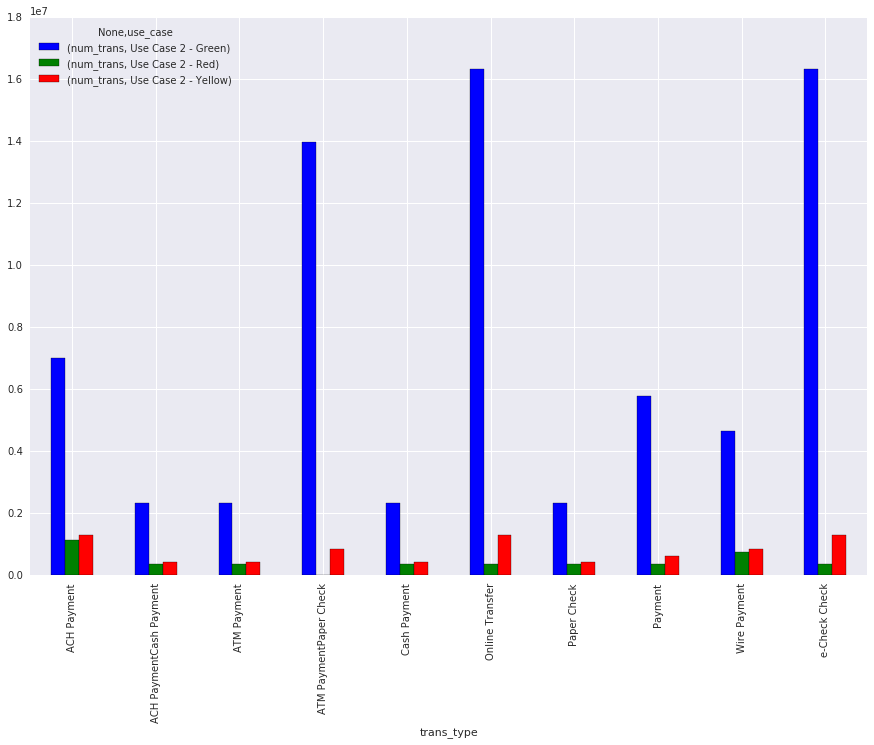

In [13]:
_ = trans_by_type_pivoted.plot(kind='bar', figsize=(15,10))

In [14]:
'''trans_by_type_pivoted = trans_by_type_pivoted.divide(trans_by_type_pivoted.sum(axis=0), axis=0)
trans_by_type_pivoted'''

sum = trans_by_type_pivoted.sum(axis=0)
sum

           use_case           
num_trans  Use Case 2 - Green     73422024
           Use Case 2 - Red        4490637
           Use Case 2 - Yellow     7929910
dtype: float64

In [15]:
trans_by_type_pivoted = trans_by_type_pivoted.divide(sum, axis=1) * 100
trans_by_type_pivoted

num_trans                   \
use_case                Use Case 2 - Green Use Case 2 - Red   
trans_type                                                    
ACH Payment                       9.527954        25.081831   
ACH PaymentCash Payment           3.177480         8.386538   
ATM Payment                       3.176201         8.389879   
ATM PaymentPaper Check           19.055863         0.000000   
Cash Payment                      3.174651         8.391014   
Online Transfer                  22.240155         8.360729   
Paper Check                       3.177342         8.377342   
Payment                           7.885412         7.879149   
Wire Payment                      6.354734        16.773500   
e-Check Check                    22.230208         8.360017   

                                             
use_case                Use Case 2 - Yellow  
trans_type                                   
ACH Payment                       16.273173  
ACH PaymentCash Payment            5.418649  
ATM Payment                        5.412987  
ATM PaymentPaper Check            10.821838  
Cash Payment                       5.414916  
Online Transfer                   16.237044  
Paper Check                        5.410061  
Payment                            7.882939  
Wire Payment                      10.835936  
e-Check Check                     16.292455

In [16]:
trans_by_type_pivoted.sum()

           use_case           
num_trans  Use Case 2 - Green     100
           Use Case 2 - Red       100
           Use Case 2 - Yellow    100
dtype: float64

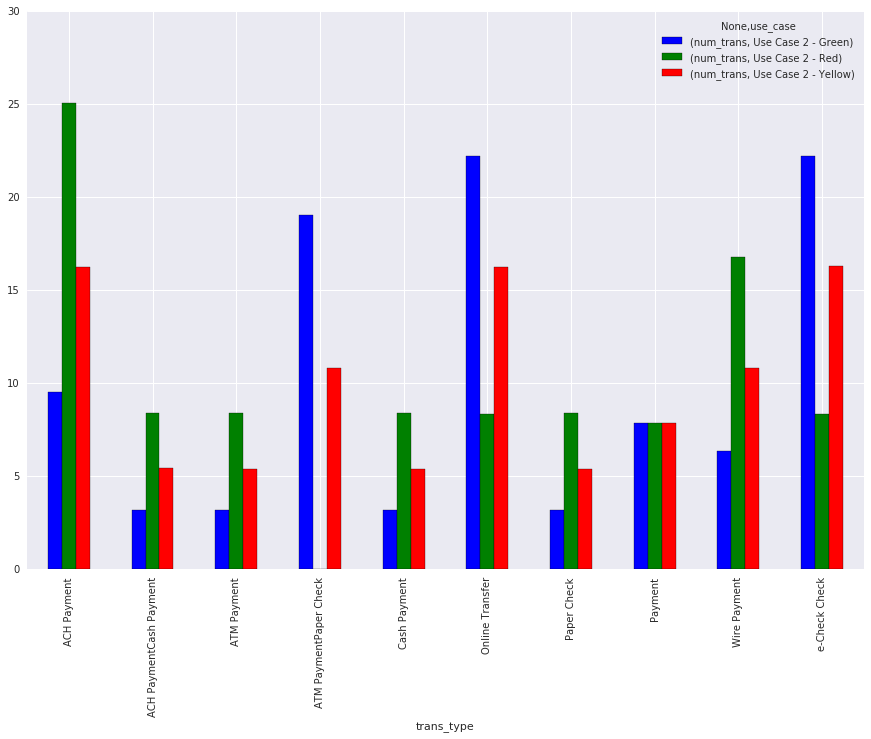

In [17]:
_ = trans_by_type_pivoted.plot(kind='bar', figsize=(15,10))

So, plenty of signal seemingly...

## What would our model look like..?

### V1

* Ordered sequence of TRANSACTION_TYPE.  I.e. an in-order sequence of the payments made.  The simplest possible baseline...

* ROWNUM	
* ACCOUNTID	
* MERCHANT_NAME	
* MERCHANT_CATEGORY_CODE	
* MERCHANT_CATEGORY_DESC	
* MERCHANT_COUNTRY	
* POST_DATE	
* TRANSACTION_DATE	
* TRANSACTION_TYPE	
* CREDIT_DEBIT	
* CREDIT_LIMIT	
* AMOUNT	
* BALANCE	
* CREDITCARDNUMBER	
* CC_TYPE	
* USE_CASE	
* CUST_NAME	
* NUM_CCS	
* CUST_CITY	
* CUST_STATE	
* CUST_ZIP	
* CUST_COUNTRY	
* TRANS_DETAIL

In [18]:
%%sql --module use_case_2

DEFINE QUERY sample_trans_green
SELECT
  *
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE = 'Use Case 2 - Green'
ORDER BY
  TRANSACTION_DATE
LIMIT
  5000

DEFINE QUERY sample_trans_yellow
SELECT
  *
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE = 'Use Case 2 - Yellow'
ORDER BY
  TRANSACTION_DATE
LIMIT
  5000

DEFINE QUERY sample_trans_red
SELECT
  *
FROM
  [CreditCardv2.cc_trans_02052016]
WHERE
  USE_CASE = 'Use Case 2 - Red'
ORDER BY
  TRANSACTION_DATE
LIMIT
  5000

In [19]:
sample_trans_green = bq.Query(use_case_2.sample_trans_green).to_dataframe()

In [20]:
sample_trans_green[sample_trans_green.CREDIT_DEBIT == 'C']

,ROWNUM,ACCOUNTID,MERCHANT_NAME,MERCHANT_CATEGORY_CODE,MERCHANT_CATEGORY_DESC,MERCHANT_COUNTRY,POST_DATE,TRANSACTION_DATE,TRANSACTION_TYPE,CREDIT_DEBIT,CREDIT_LIMIT,AMOUNT,BALANCE,CREDITCARDNUMBER,CC_TYPE,USE_CASE,CUST_NAME,NUM_CCS,CUST_CITY,CUST_STATE,CUST_ZIP,CUST_COUNTRY,TRANS_DETAIL
1,0_2016-02-03 21:55:17,12902573,None,1111,Customer Payment,US,2015-01-02,2015-01-01,e-Check Check,C,5000,681,5681,25182233556829487,amex,Use Case 2 - Green,Scot Conn,1,BRONX,NY,10463,US,None
2,0_2016-02-04 09:08:21,62490806,None,1111,Customer Payment,US,2015-01-02,2015-01-01,e-Check Check,C,24000,21492,45492,85262315097983031,visa,Use Case 2 - Green,China Fritsch,2,HOLLYWOOD,FL,33021,US,None
3,0_2016-02-04 00:56:46,26183129,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ATM Payment,C,18000,11176,29176,18382245340742165,mastercard,Use Case 2 - Green,Dr. Juana Hagenes PhD,2,FORT LAUDERDALE,FL,33311,US,None
5,0_2016-02-04 04:55:06,43841553,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ATM PaymentPaper Check,C,1000,206,1206,60402300039936351,discover,Use Case 2 - Green,Halsey Gutmann,2,SANTA MARIA,CA,93458,US,None
8,0_2016-02-04 12:07:36,75674104,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Wire Payment,C,18000,7658,25658,86362325449969176,mastercard,Use Case 2 - Green,Vita Wiza,2,SAVANNAH,GA,31419,US,None
9,0_2016-02-04 19:42:47,108781509,None,1111,Customer Payment,US,2015-01-02,2015-01-01,e-Check Check,C,10000,8343,18343,69312352219521947,visa,Use Case 2 - Green,Samson Marvin,2,TAYLOR,MI,48180,US,None
10,0_2016-02-04 07:32:37,55470721,None,1111,Customer Payment,US,2015-01-02,2015-01-01,e-Check Check,C,11000,1921,12921,32192309313177713,visa,Use Case 2 - Green,Tracy Zemlak,2,CHICAGO HEIGHTS,IL,60411,US,None
15,0_2016-02-04 22:24:14,121115238,None,1111,Customer Payment,US,2015-01-02,2015-01-01,e-Check Check,C,19000,9927,28927,10980002177723595,amex,Use Case 2 - Green,Porter Schowalter,1,MONROE TOWNSHIP,NJ,8831,US,None
16,0_2016-02-04 14:13:32,84772048,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH Payment,C,2000,1036,3036,51972333023456925,amex,Use Case 2 - Green,Jovanni Adams II,2,NORTH HOLLYWOOD,CA,91605,US,None
17,0_2016-02-04 03:54:39,39322479,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ATM PaymentPaper Check,C,20000,17190,37190,07252256231173388,discover,Use Case 2 - Green,Stafford Ortiz,2,BRONX,NY,10467,US,None


In [21]:
sample_trans_yellow = bq.Query(use_case_2.sample_trans_yellow).to_dataframe()

In [22]:
sample_trans_yellow[sample_trans_yellow.CREDIT_DEBIT == 'C']

,ROWNUM,ACCOUNTID,MERCHANT_NAME,MERCHANT_CATEGORY_CODE,MERCHANT_CATEGORY_DESC,MERCHANT_COUNTRY,POST_DATE,TRANSACTION_DATE,TRANSACTION_TYPE,CREDIT_DEBIT,CREDIT_LIMIT,AMOUNT,BALANCE,CREDITCARDNUMBER,CC_TYPE,USE_CASE,CUST_NAME,NUM_CCS,CUST_CITY,CUST_STATE,CUST_ZIP,CUST_COUNTRY,TRANS_DETAIL
0,0_2016-02-04 04:13:28,40725746,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH Payment,C,22000,421,22421,80612257319232443,visa,Use Case 2 - Yellow,Melonie Oberbrunner,2,SPRINGFIELD,MO,65807,US,None
1,0_2016-02-04 12:08:56,75772851,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Wire Payment,C,1000,308,1308,52742325497553808,visa,Use Case 2 - Yellow,Miss Iyanna Harvey PhD,1,COLUMBUS,OH,43229,US,None
2,0_2016-02-04 07:25:53,54975013,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Wire Payment,C,1000,256,1256,27842309074928098,discover,Use Case 2 - Yellow,Zane Murazik,1,UNION CITY,CA,94587,US,None
4,0_2016-02-04 21:19:39,116241229,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Online Transfer,C,11000,8730,19730,55822358211752399,discover,Use Case 2 - Yellow,Tammy Abernathy DVM,2,MOUNT PROSPECT,IL,60056,US,None
8,0_2016-02-04 15:11:54,88952932,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH Payment,C,12000,1700,13700,56612336228173935,amex,Use Case 2 - Yellow,Eldridge Stamm,2,MIAMI,FL,33165,US,None
9,0_2016-02-04 11:57:29,74924877,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH Payment,C,18000,8477,26477,54542325088764660,mastercard,Use Case 2 - Yellow,Jeanie Ledner,2,SACRAMENTO,CA,95828,US,None
10,0_2016-02-04 03:05:54,35724636,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Paper Check,C,8000,3812,11812,24422253283574107,mastercard,Use Case 2 - Yellow,Shanita Hauck,1,SACRAMENTO,CA,95828,US,None
13,0_2016-02-04 04:57:46,44037808,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH Payment,C,6000,136,6136,07912300137805689,mastercard,Use Case 2 - Yellow,Alfonzo Balistreri,1,FORT WASHINGTON,MD,20744,US,None
20,0_2016-02-04 18:39:29,103945202,None,1111,Customer Payment,US,2015-01-02,2015-01-01,e-Check Check,C,16000,12597,28597,23282348280119927,mastercard,Use Case 2 - Yellow,Mr. Garfield Haag I,1,SOUTH RICHMOND HILL,NY,11419,US,None
21,0_2016-02-04 01:26:47,28395286,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Online Transfer,C,14000,8725,22725,25902247287686034,amex,Use Case 2 - Yellow,Farrell Daniel,2,BRISTOL,CT,6010,US,None


In [23]:
sample_trans_red = bq.Query(use_case_2.sample_trans_red).to_dataframe()

In [24]:
sample_trans_red[sample_trans_red.CREDIT_DEBIT == 'C']

,ROWNUM,ACCOUNTID,MERCHANT_NAME,MERCHANT_CATEGORY_CODE,MERCHANT_CATEGORY_DESC,MERCHANT_COUNTRY,POST_DATE,TRANSACTION_DATE,TRANSACTION_TYPE,CREDIT_DEBIT,CREDIT_LIMIT,AMOUNT,BALANCE,CREDITCARDNUMBER,CC_TYPE,USE_CASE,CUST_NAME,NUM_CCS,CUST_CITY,CUST_STATE,CUST_ZIP,CUST_COUNTRY,TRANS_DETAIL
0,0_2016-02-04 02:33:54,33355820,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Paper Check,C,8000,4506,12506,59902251329816085,mastercard,Use Case 2 - Red,Lala Halvorson,3,WINNETKA,CA,91306,US,None
1,0_2016-02-04 00:21:46,23610256,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Paper Check,C,15000,6170,21170,94782243194775359,amex,Use Case 2 - Red,Dr. Willaim Stroman,2,OKLAHOMA CITY,OK,73160,US,None
2,0_2016-02-04 07:40:31,56050622,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH Payment,C,17000,8656,25656,03222309591481669,amex,Use Case 2 - Red,Dr. Bertie Satterfield MD,1,FRANKLIN,TN,37064,US,None
4,0_2016-02-04 21:35:18,117439802,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Online Transfer,C,2000,678,2678,19252359191922902,mastercard,Use Case 2 - Red,Lorean Bernhard,2,MARIETTA,GA,30066,US,None
6,0_2016-02-04 06:19:05,50048872,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Online Transfer,C,5000,4663,9663,69212305086112335,discover,Use Case 2 - Red,Jewell Kub,4,CHICAGO,IL,60609,US,None
11,0_2016-02-04 19:10:49,106326807,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ATM Payment,C,11000,8379,19379,62522350233886184,visa,Use Case 2 - Red,Carlee Macejkovic,1,SYLMAR,CA,91342,US,None
14,0_2016-02-04 05:10:25,44974266,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH PaymentCash Payment,C,17000,14781,31781,93262300597722672,visa,Use Case 2 - Red,Shanice Walker,4,MARTINEZ,CA,94553,US,None
15,0_2016-02-03 23:24:18,19404127,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH PaymentCash Payment,C,2000,1586,3586,37562239372538059,discover,Use Case 2 - Red,Teddy Lang,4,SPRING VALLEY,CA,91977,US,None
16,0_2016-02-04 02:54:20,34867730,None,1111,Customer Payment,US,2015-01-02,2015-01-01,Cash Payment,C,10000,6519,16519,21082252464099751,amex,Use Case 2 - Red,Samara Pollich,3,STATEN ISLAND,NY,10314,US,None
19,0_2016-02-04 17:52:44,100537259,None,1111,Customer Payment,US,2015-01-02,2015-01-01,ACH Payment,C,8000,2245,10245,98362345406121272,amex,Use Case 2 - Red,Mr. Latrell Johnston,1,SAN ANTONIO,TX,78254,US,None


In [25]:
WIDTH=800

In [26]:
sample_trans_green_wide = pd.DataFrame()
sample_trans_green_wide['USE_CASE'] = sample_trans_green[sample_trans_green.CREDIT_DEBIT == 'C'].USE_CASE
for i in range(WIDTH):
  sample_trans_green_wide['shift_' + str(i)] = sample_trans_green[sample_trans_green.CREDIT_DEBIT == 'C'].TRANSACTION_TYPE.shift(i)
sample_trans_green_wide.describe()

,USE_CASE,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30,shift_31,shift_32,shift_33,shift_34,shift_35,shift_36,shift_37,shift_38,shift_39,shift_40,shift_41,shift_42,shift_43,shift_44,shift_45,shift_46,shift_47,shift_48,shift_49,shift_50,shift_51,shift_52,shift_53,shift_54,shift_55,shift_56,shift_57,shift_58,shift_59,shift_60,shift_61,shift_62,shift_63,shift_64,shift_65,shift_66,shift_67,shift_68,shift_69,shift_70,shift_71,shift_72,shift_73,shift_74,shift_75,shift_76,shift_77,shift_78,shift_79,shift_80,shift_81,shift_82,shift_83,shift_84,shift_85,shift_86,shift_87,shift_88,shift_89,shift_90,shift_91,shift_92,shift_93,shift_94,shift_95,shift_96,shift_97,shift_98,shift_99,shift_100,shift_101,shift_102,shift_103,shift_104,shift_105,shift_106,shift_107,shift_108,shift_109,shift_110,shift_111,shift_112,shift_113,shift_114,shift_115,shift_116,shift_117,shift_118,shift_119,shift_120,shift_121,shift_122,shift_123,shift_124,shift_125,shift_126,shift_127,shift_128,shift_129,shift_130,shift_131,shift_132,shift_133,shift_134,shift_135,shift_136,shift_137,shift_138,shift_139,shift_140,shift_141,shift_142,shift_143,shift_144,shift_145,shift_146,shift_147,shift_148,shift_149,shift_150,shift_151,shift_152,shift_153,shift_154,shift_155,shift_156,shift_157,shift_158,shift_159,shift_160,shift_161,shift_162,shift_163,shift_164,shift_165,shift_166,shift_167,shift_168,shift_169,shift_170,shift_171,shift_172,shift_173,shift_174,shift_175,shift_176,shift_177,shift_178,shift_179,shift_180,shift_181,shift_182,shift_183,shift_184,shift_185,shift_186,shift_187,shift_188,shift_189,shift_190,shift_191,shift_192,shift_193,shift_194,shift_195,shift_196,shift_197,shift_198,shift_199,shift_200,shift_201,shift_202,shift_203,shift_204,shift_205,shift_206,shift_207,shift_208,shift_209,shift_210,shift_211,shift_212,shift_213,shift_214,shift_215,shift_216,shift_217,shift_218,shift_219,shift_220,shift_221,shift_222,shift_223,shift_224,shift_225,shift_226,shift_227,shift_228,shift_229,shift_230,shift_231,shift_232,shift_233,shift_234,shift_235,shift_236,shift_237,shift_238,shift_239,shift_240,shift_241,shift_242,shift_243,shift_244,shift_245,shift_246,shift_247,shift_248,shift_249,shift_250,shift_251,shift_252,shift_253,shift_254,shift_255,shift_256,shift_257,shift_258,shift_259,shift_260,shift_261,shift_262,shift_263,shift_264,shift_265,shift_266,shift_267,shift_268,shift_269,shift_270,shift_271,shift_272,shift_273,shift_274,shift_275,shift_276,shift_277,shift_278,shift_279,shift_280,shift_281,shift_282,shift_283,shift_284,shift_285,shift_286,shift_287,shift_288,shift_289,shift_290,shift_291,shift_292,shift_293,shift_294,shift_295,shift_296,shift_297,shift_298,shift_299,shift_300,shift_301,shift_302,shift_303,shift_304,shift_305,shift_306,shift_307,shift_308,shift_309,shift_310,shift_311,shift_312,shift_313,shift_314,shift_315,shift_316,shift_317,shift_318,shift_319,shift_320,shift_321,shift_322,shift_323,shift_324,shift_325,shift_326,shift_327,shift_328,shift_329,shift_330,shift_331,shift_332,shift_333,shift_334,shift_335,shift_336,shift_337,shift_338,shift_339,shift_340,shift_341,shift_342,shift_343,shift_344,shift_345,shift_346,shift_347,shift_348,shift_349,shift_350,shift_351,shift_352,shift_353,shift_354,shift_355,shift_356,shift_357,shift_358,shift_359,shift_360,shift_361,shift_362,shift_363,shift_364,shift_365,shift_366,shift_367,shift_368,shift_369,shift_370,shift_371,shift_372,shift_373,shift_374,shift_375,shift_376,shift_377,shift_378,shift_379,shift_380,shift_381,shift_382,shift_383,shift_384,shift_385,shift_386,shift_387,shift_388,shift_389,shift_390,shift_391,shift_392,shift_393,shift_394,shift_395,shift_396,shift_397,shift_398,shift_399,shift_400,shift_401,shift_402,shift_403,shift_404,shift_405,shift_406,shift_407,shift_408,shift_409,

In [27]:
sample_trans_yellow_wide = pd.DataFrame()
sample_trans_yellow_wide['USE_CASE'] = sample_trans_yellow[sample_trans_yellow.CREDIT_DEBIT == 'C'].USE_CASE
for i in range(WIDTH):
  sample_trans_yellow_wide['shift_' + str(i)] = sample_trans_yellow[sample_trans_yellow.CREDIT_DEBIT == 'C'].TRANSACTION_TYPE.shift(i)
sample_trans_yellow_wide.describe()

,USE_CASE,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30,shift_31,shift_32,shift_33,shift_34,shift_35,shift_36,shift_37,shift_38,shift_39,shift_40,shift_41,shift_42,shift_43,shift_44,shift_45,shift_46,shift_47,shift_48,shift_49,shift_50,shift_51,shift_52,shift_53,shift_54,shift_55,shift_56,shift_57,shift_58,shift_59,shift_60,shift_61,shift_62,shift_63,shift_64,shift_65,shift_66,shift_67,shift_68,shift_69,shift_70,shift_71,shift_72,shift_73,shift_74,shift_75,shift_76,shift_77,shift_78,shift_79,shift_80,shift_81,shift_82,shift_83,shift_84,shift_85,shift_86,shift_87,shift_88,shift_89,shift_90,shift_91,shift_92,shift_93,shift_94,shift_95,shift_96,shift_97,shift_98,shift_99,shift_100,shift_101,shift_102,shift_103,shift_104,shift_105,shift_106,shift_107,shift_108,shift_109,shift_110,shift_111,shift_112,shift_113,shift_114,shift_115,shift_116,shift_117,shift_118,shift_119,shift_120,shift_121,shift_122,shift_123,shift_124,shift_125,shift_126,shift_127,shift_128,shift_129,shift_130,shift_131,shift_132,shift_133,shift_134,shift_135,shift_136,shift_137,shift_138,shift_139,shift_140,shift_141,shift_142,shift_143,shift_144,shift_145,shift_146,shift_147,shift_148,shift_149,shift_150,shift_151,shift_152,shift_153,shift_154,shift_155,shift_156,shift_157,shift_158,shift_159,shift_160,shift_161,shift_162,shift_163,shift_164,shift_165,shift_166,shift_167,shift_168,shift_169,shift_170,shift_171,shift_172,shift_173,shift_174,shift_175,shift_176,shift_177,shift_178,shift_179,shift_180,shift_181,shift_182,shift_183,shift_184,shift_185,shift_186,shift_187,shift_188,shift_189,shift_190,shift_191,shift_192,shift_193,shift_194,shift_195,shift_196,shift_197,shift_198,shift_199,shift_200,shift_201,shift_202,shift_203,shift_204,shift_205,shift_206,shift_207,shift_208,shift_209,shift_210,shift_211,shift_212,shift_213,shift_214,shift_215,shift_216,shift_217,shift_218,shift_219,shift_220,shift_221,shift_222,shift_223,shift_224,shift_225,shift_226,shift_227,shift_228,shift_229,shift_230,shift_231,shift_232,shift_233,shift_234,shift_235,shift_236,shift_237,shift_238,shift_239,shift_240,shift_241,shift_242,shift_243,shift_244,shift_245,shift_246,shift_247,shift_248,shift_249,shift_250,shift_251,shift_252,shift_253,shift_254,shift_255,shift_256,shift_257,shift_258,shift_259,shift_260,shift_261,shift_262,shift_263,shift_264,shift_265,shift_266,shift_267,shift_268,shift_269,shift_270,shift_271,shift_272,shift_273,shift_274,shift_275,shift_276,shift_277,shift_278,shift_279,shift_280,shift_281,shift_282,shift_283,shift_284,shift_285,shift_286,shift_287,shift_288,shift_289,shift_290,shift_291,shift_292,shift_293,shift_294,shift_295,shift_296,shift_297,shift_298,shift_299,shift_300,shift_301,shift_302,shift_303,shift_304,shift_305,shift_306,shift_307,shift_308,shift_309,shift_310,shift_311,shift_312,shift_313,shift_314,shift_315,shift_316,shift_317,shift_318,shift_319,shift_320,shift_321,shift_322,shift_323,shift_324,shift_325,shift_326,shift_327,shift_328,shift_329,shift_330,shift_331,shift_332,shift_333,shift_334,shift_335,shift_336,shift_337,shift_338,shift_339,shift_340,shift_341,shift_342,shift_343,shift_344,shift_345,shift_346,shift_347,shift_348,shift_349,shift_350,shift_351,shift_352,shift_353,shift_354,shift_355,shift_356,shift_357,shift_358,shift_359,shift_360,shift_361,shift_362,shift_363,shift_364,shift_365,shift_366,shift_367,shift_368,shift_369,shift_370,shift_371,shift_372,shift_373,shift_374,shift_375,shift_376,shift_377,shift_378,shift_379,shift_380,shift_381,shift_382,shift_383,shift_384,shift_385,shift_386,shift_387,shift_388,shift_389,shift_390,shift_391,shift_392,shift_393,shift_394,shift_395,shift_396,shift_397,shift_398,shift_399,shift_400,shift_401,shift_402,shift_403,shift_404,shift_405,shift_406,shift_407,shift_408,shift_409,

In [28]:
sample_trans_red_wide = pd.DataFrame()
sample_trans_red_wide['USE_CASE'] = sample_trans_red[sample_trans_red.CREDIT_DEBIT == 'C'].USE_CASE
for i in range(WIDTH):
  sample_trans_red_wide['shift_' + str(i)] = sample_trans_red[sample_trans_red.CREDIT_DEBIT == 'C'].TRANSACTION_TYPE.shift(i)
sample_trans_red_wide.describe()

,USE_CASE,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30,shift_31,shift_32,shift_33,shift_34,shift_35,shift_36,shift_37,shift_38,shift_39,shift_40,shift_41,shift_42,shift_43,shift_44,shift_45,shift_46,shift_47,shift_48,shift_49,shift_50,shift_51,shift_52,shift_53,shift_54,shift_55,shift_56,shift_57,shift_58,shift_59,shift_60,shift_61,shift_62,shift_63,shift_64,shift_65,shift_66,shift_67,shift_68,shift_69,shift_70,shift_71,shift_72,shift_73,shift_74,shift_75,shift_76,shift_77,shift_78,shift_79,shift_80,shift_81,shift_82,shift_83,shift_84,shift_85,shift_86,shift_87,shift_88,shift_89,shift_90,shift_91,shift_92,shift_93,shift_94,shift_95,shift_96,shift_97,shift_98,shift_99,shift_100,shift_101,shift_102,shift_103,shift_104,shift_105,shift_106,shift_107,shift_108,shift_109,shift_110,shift_111,shift_112,shift_113,shift_114,shift_115,shift_116,shift_117,shift_118,shift_119,shift_120,shift_121,shift_122,shift_123,shift_124,shift_125,shift_126,shift_127,shift_128,shift_129,shift_130,shift_131,shift_132,shift_133,shift_134,shift_135,shift_136,shift_137,shift_138,shift_139,shift_140,shift_141,shift_142,shift_143,shift_144,shift_145,shift_146,shift_147,shift_148,shift_149,shift_150,shift_151,shift_152,shift_153,shift_154,shift_155,shift_156,shift_157,shift_158,shift_159,shift_160,shift_161,shift_162,shift_163,shift_164,shift_165,shift_166,shift_167,shift_168,shift_169,shift_170,shift_171,shift_172,shift_173,shift_174,shift_175,shift_176,shift_177,shift_178,shift_179,shift_180,shift_181,shift_182,shift_183,shift_184,shift_185,shift_186,shift_187,shift_188,shift_189,shift_190,shift_191,shift_192,shift_193,shift_194,shift_195,shift_196,shift_197,shift_198,shift_199,shift_200,shift_201,shift_202,shift_203,shift_204,shift_205,shift_206,shift_207,shift_208,shift_209,shift_210,shift_211,shift_212,shift_213,shift_214,shift_215,shift_216,shift_217,shift_218,shift_219,shift_220,shift_221,shift_222,shift_223,shift_224,shift_225,shift_226,shift_227,shift_228,shift_229,shift_230,shift_231,shift_232,shift_233,shift_234,shift_235,shift_236,shift_237,shift_238,shift_239,shift_240,shift_241,shift_242,shift_243,shift_244,shift_245,shift_246,shift_247,shift_248,shift_249,shift_250,shift_251,shift_252,shift_253,shift_254,shift_255,shift_256,shift_257,shift_258,shift_259,shift_260,shift_261,shift_262,shift_263,shift_264,shift_265,shift_266,shift_267,shift_268,shift_269,shift_270,shift_271,shift_272,shift_273,shift_274,shift_275,shift_276,shift_277,shift_278,shift_279,shift_280,shift_281,shift_282,shift_283,shift_284,shift_285,shift_286,shift_287,shift_288,shift_289,shift_290,shift_291,shift_292,shift_293,shift_294,shift_295,shift_296,shift_297,shift_298,shift_299,shift_300,shift_301,shift_302,shift_303,shift_304,shift_305,shift_306,shift_307,shift_308,shift_309,shift_310,shift_311,shift_312,shift_313,shift_314,shift_315,shift_316,shift_317,shift_318,shift_319,shift_320,shift_321,shift_322,shift_323,shift_324,shift_325,shift_326,shift_327,shift_328,shift_329,shift_330,shift_331,shift_332,shift_333,shift_334,shift_335,shift_336,shift_337,shift_338,shift_339,shift_340,shift_341,shift_342,shift_343,shift_344,shift_345,shift_346,shift_347,shift_348,shift_349,shift_350,shift_351,shift_352,shift_353,shift_354,shift_355,shift_356,shift_357,shift_358,shift_359,shift_360,shift_361,shift_362,shift_363,shift_364,shift_365,shift_366,shift_367,shift_368,shift_369,shift_370,shift_371,shift_372,shift_373,shift_374,shift_375,shift_376,shift_377,shift_378,shift_379,shift_380,shift_381,shift_382,shift_383,shift_384,shift_385,shift_386,shift_387,shift_388,shift_389,shift_390,shift_391,shift_392,shift_393,shift_394,shift_395,shift_396,shift_397,shift_398,shift_399,shift_400,shift_401,shift_402,shift_403,shift_404,shift_405,shift_406,shift_407,shift_408,shift_409,

In [29]:
sample_trans_wide = pd.concat([sample_trans_green_wide, sample_trans_yellow_wide, sample_trans_red_wide])
sample_trans_wide.describe()

,USE_CASE,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30,shift_31,shift_32,shift_33,shift_34,shift_35,shift_36,shift_37,shift_38,shift_39,shift_40,shift_41,shift_42,shift_43,shift_44,shift_45,shift_46,shift_47,shift_48,shift_49,shift_50,shift_51,shift_52,shift_53,shift_54,shift_55,shift_56,shift_57,shift_58,shift_59,shift_60,shift_61,shift_62,shift_63,shift_64,shift_65,shift_66,shift_67,shift_68,shift_69,shift_70,shift_71,shift_72,shift_73,shift_74,shift_75,shift_76,shift_77,shift_78,shift_79,shift_80,shift_81,shift_82,shift_83,shift_84,shift_85,shift_86,shift_87,shift_88,shift_89,shift_90,shift_91,shift_92,shift_93,shift_94,shift_95,shift_96,shift_97,shift_98,shift_99,shift_100,shift_101,shift_102,shift_103,shift_104,shift_105,shift_106,shift_107,shift_108,shift_109,shift_110,shift_111,shift_112,shift_113,shift_114,shift_115,shift_116,shift_117,shift_118,shift_119,shift_120,shift_121,shift_122,shift_123,shift_124,shift_125,shift_126,shift_127,shift_128,shift_129,shift_130,shift_131,shift_132,shift_133,shift_134,shift_135,shift_136,shift_137,shift_138,shift_139,shift_140,shift_141,shift_142,shift_143,shift_144,shift_145,shift_146,shift_147,shift_148,shift_149,shift_150,shift_151,shift_152,shift_153,shift_154,shift_155,shift_156,shift_157,shift_158,shift_159,shift_160,shift_161,shift_162,shift_163,shift_164,shift_165,shift_166,shift_167,shift_168,shift_169,shift_170,shift_171,shift_172,shift_173,shift_174,shift_175,shift_176,shift_177,shift_178,shift_179,shift_180,shift_181,shift_182,shift_183,shift_184,shift_185,shift_186,shift_187,shift_188,shift_189,shift_190,shift_191,shift_192,shift_193,shift_194,shift_195,shift_196,shift_197,shift_198,shift_199,shift_200,shift_201,shift_202,shift_203,shift_204,shift_205,shift_206,shift_207,shift_208,shift_209,shift_210,shift_211,shift_212,shift_213,shift_214,shift_215,shift_216,shift_217,shift_218,shift_219,shift_220,shift_221,shift_222,shift_223,shift_224,shift_225,shift_226,shift_227,shift_228,shift_229,shift_230,shift_231,shift_232,shift_233,shift_234,shift_235,shift_236,shift_237,shift_238,shift_239,shift_240,shift_241,shift_242,shift_243,shift_244,shift_245,shift_246,shift_247,shift_248,shift_249,shift_250,shift_251,shift_252,shift_253,shift_254,shift_255,shift_256,shift_257,shift_258,shift_259,shift_260,shift_261,shift_262,shift_263,shift_264,shift_265,shift_266,shift_267,shift_268,shift_269,shift_270,shift_271,shift_272,shift_273,shift_274,shift_275,shift_276,shift_277,shift_278,shift_279,shift_280,shift_281,shift_282,shift_283,shift_284,shift_285,shift_286,shift_287,shift_288,shift_289,shift_290,shift_291,shift_292,shift_293,shift_294,shift_295,shift_296,shift_297,shift_298,shift_299,shift_300,shift_301,shift_302,shift_303,shift_304,shift_305,shift_306,shift_307,shift_308,shift_309,shift_310,shift_311,shift_312,shift_313,shift_314,shift_315,shift_316,shift_317,shift_318,shift_319,shift_320,shift_321,shift_322,shift_323,shift_324,shift_325,shift_326,shift_327,shift_328,shift_329,shift_330,shift_331,shift_332,shift_333,shift_334,shift_335,shift_336,shift_337,shift_338,shift_339,shift_340,shift_341,shift_342,shift_343,shift_344,shift_345,shift_346,shift_347,shift_348,shift_349,shift_350,shift_351,shift_352,shift_353,shift_354,shift_355,shift_356,shift_357,shift_358,shift_359,shift_360,shift_361,shift_362,shift_363,shift_364,shift_365,shift_366,shift_367,shift_368,shift_369,shift_370,shift_371,shift_372,shift_373,shift_374,shift_375,shift_376,shift_377,shift_378,shift_379,shift_380,shift_381,shift_382,shift_383,shift_384,shift_385,shift_386,shift_387,shift_388,shift_389,shift_390,shift_391,shift_392,shift_393,shift_394,shift_395,shift_396,shift_397,shift_398,shift_399,shift_400,shift_401,shift_402,shift_403,shift_404,shift_405,shift_406,shift_407,shift_408,shift_409,

In [30]:
sample_trans_wide = sample_trans_wide.fillna('Missing')
sample_trans_wide[:10]

USE_CASE                 shift_0                 shift_1  \
1   Use Case 2 - Green           e-Check Check                 Missing   
2   Use Case 2 - Green           e-Check Check           e-Check Check   
3   Use Case 2 - Green             ATM Payment           e-Check Check   
5   Use Case 2 - Green  ATM PaymentPaper Check             ATM Payment   
8   Use Case 2 - Green            Wire Payment  ATM PaymentPaper Check   
9   Use Case 2 - Green           e-Check Check            Wire Payment   
10  Use Case 2 - Green           e-Check Check           e-Check Check   
15  Use Case 2 - Green           e-Check Check           e-Check Check   
16  Use Case 2 - Green             ACH Payment           e-Check Check   
17  Use Case 2 - Green  ATM PaymentPaper Check             ACH Payment   

                   shift_2                 shift_3                 shift_4  \
1                  Missing                 Missing                 Missing   
2                  Missing                 Missing                 Missing   
3            e-Check Check                 Missing                 Missing   
5            e-Check Check           e-Check Check                 Missing   
8              ATM Payment           e-Check Check           e-Check Check   
9   ATM PaymentPaper Check             ATM Payment           e-Check Check   
10            Wire Payment  ATM PaymentPaper Check             ATM Payment   
15           e-Check Check            Wire Payment  ATM PaymentPaper Check   
16           e-Check Check           e-Check Check            Wire Payment   
17           e-Check Check           e-Check Check           e-Check Check   

                   shift_5                 shift_6        shift_7  \
1                  Missing                 Missing        Missing   
2                  Missing                 Missing        Missing   
3                  Missing                 Missing        Missing   
5                  Missing                 Missing        Missing   
8                  Missing                 Missing        Missing   
9            e-Check Check                 Missing        Missing   
10           e-Check Check           e-Check Check        Missing   
15             ATM Payment           e-Check Check  e-Check Check   
16  ATM PaymentPaper Check             ATM Payment  e-Check Check   
17            Wire Payment  ATM PaymentPaper Check    ATM Payment   

          shift_8        shift_9 shift_10 shift_11 shift_12 shift_13 shift_14  \
1         Missing        Missing  Missing  Missing  Missing  Missing  Missing   
2         Missing        Missing  Missing  Missing  Missing  Missing  Missing   
3         Missing        Missing  Missing  Missing  Missing  Missing  Missing   
5         Missing        Missing  Missing  Missing  Missing  Missing  Missing   
8         Missing        Missing  Missing  Missing  Missing  Missing  Missing   
9         Missing        Missing  Missing  Missing  Missing  Missing  Missing   
10        Missing        Missing  Missing  Missing  Missing  Missing  Missing   
15        Missing        Missing  Missing  Missing  Missing  Missing  Missing   
16  e-Check Check        Missing  Missing  Missing  Missing  Missing  Missing   
17  e-Check Check  e-Check Check  Missing  Missing  Missing  Missing  Missing   

   shift_15 shift_16 shift_17 shift_18 shift_19 shift_20 shift_21 shift_22  \
1   Missing  Missing  Missing  Missing  Missing  Missing  Missing  Missing   
2   Missing  Missing  Missing  Missing  Missing  Missing  Missing  Missing   
3   Missing  Missing  Missing  Missing  Missing  Missing  Missing  Missing   
5   Missing  Missing  Missing  Missing  Missing  Missing  Missing  Missing   
8   Missing  Missing  Missing  Missing  Missing  Missing  Missing  Missing   
9   Missing  Missing  Missing  Missing  Missing  Missing  Missing  Missing   
10  Missing  Missing  Missing  Missing  Missing  Missing  Missing  Missing   
15  Missing  Missing  Missing  Missing  Missing  Missing  Missin

In [31]:
from sklearn import preprocessing

shift_encoder = preprocessing.LabelEncoder()
shift_encoder.fit(sample_trans_wide.shift_1.drop_duplicates()) # User shift_1 because it includes 'Missing'
#print list(shift_encoder.classes_), '\n'

use_case_encoder = preprocessing.LabelEncoder()
use_case_encoder.fit(sample_trans_wide.USE_CASE.drop_duplicates())

sample_trans_wide_enc = pd.DataFrame(index=sample_trans_wide.index)

sample_trans_wide_enc['USE_CASE'] = use_case_encoder.transform(sample_trans_wide.USE_CASE)

for i in range(WIDTH):
  sample_trans_wide_enc['shift_' + str(i) + '_enc'] = shift_encoder.transform(sample_trans_wide['shift_' + str(i)])

sample_trans_wide_enc.describe()

,USE_CASE,shift_0_enc,shift_1_enc,shift_2_enc,shift_3_enc,shift_4_enc,shift_5_enc,shift_6_enc,shift_7_enc,shift_8_enc,shift_9_enc,shift_10_enc,shift_11_enc,shift_12_enc,shift_13_enc,shift_14_enc,shift_15_enc,shift_16_enc,shift_17_enc,shift_18_enc,shift_19_enc,shift_20_enc,shift_21_enc,shift_22_enc,shift_23_enc,shift_24_enc,shift_25_enc,shift_26_enc,shift_27_enc,shift_28_enc,shift_29_enc,shift_30_enc,shift_31_enc,shift_32_enc,shift_33_enc,shift_34_enc,shift_35_enc,shift_36_enc,shift_37_enc,shift_38_enc,shift_39_enc,shift_40_enc,shift_41_enc,shift_42_enc,shift_43_enc,shift_44_enc,shift_45_enc,shift_46_enc,shift_47_enc,shift_48_enc,shift_49_enc,shift_50_enc,shift_51_enc,shift_52_enc,shift_53_enc,shift_54_enc,shift_55_enc,shift_56_enc,shift_57_enc,shift_58_enc,shift_59_enc,shift_60_enc,shift_61_enc,shift_62_enc,shift_63_enc,shift_64_enc,shift_65_enc,shift_66_enc,shift_67_enc,shift_68_enc,shift_69_enc,shift_70_enc,shift_71_enc,shift_72_enc,shift_73_enc,shift_74_enc,shift_75_enc,shift_76_enc,shift_77_enc,shift_78_enc,shift_79_enc,shift_80_enc,shift_81_enc,shift_82_enc,shift_83_enc,shift_84_enc,shift_85_enc,shift_86_enc,shift_87_enc,shift_88_enc,shift_89_enc,shift_90_enc,shift_91_enc,shift_92_enc,shift_93_enc,shift_94_enc,shift_95_enc,shift_96_enc,shift_97_enc,shift_98_enc,shift_99_enc,shift_100_enc,shift_101_enc,shift_102_enc,shift_103_enc,shift_104_enc,shift_105_enc,shift_106_enc,shift_107_enc,shift_108_enc,shift_109_enc,shift_110_enc,shift_111_enc,shift_112_enc,shift_113_enc,shift_114_enc,shift_115_enc,shift_116_enc,shift_117_enc,shift_118_enc,shift_119_enc,shift_120_enc,shift_121_enc,shift_122_enc,shift_123_enc,shift_124_enc,shift_125_enc,shift_126_enc,shift_127_enc,shift_128_enc,shift_129_enc,shift_130_enc,shift_131_enc,shift_132_enc,shift_133_enc,shift_134_enc,shift_135_enc,shift_136_enc,shift_137_enc,shift_138_enc,shift_139_enc,shift_140_enc,shift_141_enc,shift_142_enc,shift_143_enc,shift_144_enc,shift_145_enc,shift_146_enc,shift_147_enc,shift_148_enc,shift_149_enc,shift_150_enc,shift_151_enc,shift_152_enc,shift_153_enc,shift_154_enc,shift_155_enc,shift_156_enc,shift_157_enc,shift_158_enc,shift_159_enc,shift_160_enc,shift_161_enc,shift_162_enc,shift_163_enc,shift_164_enc,shift_165_enc,shift_166_enc,shift_167_enc,shift_168_enc,shift_169_enc,shift_170_enc,shift_171_enc,shift_172_enc,shift_173_enc,shift_174_enc,shift_175_enc,shift_176_enc,shift_177_enc,shift_178_enc,shift_179_enc,shift_180_enc,shift_181_enc,shift_182_enc,shift_183_enc,shift_184_enc,shift_185_enc,shift_186_enc,shift_187_enc,shift_188_enc,shift_189_enc,shift_190_enc,shift_191_enc,shift_192_enc,shift_193_enc,shift_194_enc,shift_195_enc,shift_196_enc,shift_197_enc,shift_198_enc,shift_199_enc,shift_200_enc,shift_201_enc,shift_202_enc,shift_203_enc,shift_204_enc,shift_205_enc,shift_206_enc,shift_207_enc,shift_208_enc,shift_209_enc,shift_210_enc,shift_211_enc,shift_212_enc,shift_213_enc,shift_214_enc,shift_215_enc,shift_216_enc,shift_217_enc,shift_218_enc,shift_219_enc,shift_220_enc,shift_221_enc,shift_222_enc,shift_223_enc,shift_224_enc,shift_225_enc,shift_226_enc,shift_227_enc,shift_228_enc,shift_229_enc,shift_230_enc,shift_231_enc,shift_232_enc,shift_233_enc,shift_234_enc,shift_235_enc,shift_236_enc,shift_237_enc,shift_238_enc,shift_239_enc,shift_240_enc,shift_241_enc,shift_242_enc,shift_243_enc,shift_244_enc,shift_245_enc,shift_246_enc,shift_247_enc,shift_248_enc,shift_249_enc,shift_250_enc,shift_251_enc,shift_252_enc,shift_253_enc,shift_254_enc,shift_255_enc,shift_256_enc,shift_257_enc,shift_258_enc,shift_259_enc,shift_260_enc,shift_261_enc,shift_262_enc,shift_263_enc,shift_264_enc,shift_265_enc,shift_266_enc,shift_267_enc,shift_268_enc,shift_269_enc,shift_270_enc,shift_271_enc,shift_272_enc,shift_273_enc,shift_274_enc,shift_275_enc,shift_276_enc,shift_277_enc,shift_278_enc,shift_279_enc,shift_280_enc,shift_281_enc,shift_282_enc,shift_283_enc,shift_284_enc,shift_285_enc,shift_286_enc,shift_287_enc,shift_288_enc,shift_289_enc,shift_290_enc,shift_291_enc,shift_292_en

In [32]:
X = sample_trans_wide_enc[sample_trans_wide_enc.columns[1:]]
X[:10]

,shift_0_enc,shift_1_enc,shift_2_enc,shift_3_enc,shift_4_enc,shift_5_enc,shift_6_enc,shift_7_enc,shift_8_enc,shift_9_enc,shift_10_enc,shift_11_enc,shift_12_enc,shift_13_enc,shift_14_enc,shift_15_enc,shift_16_enc,shift_17_enc,shift_18_enc,shift_19_enc,shift_20_enc,shift_21_enc,shift_22_enc,shift_23_enc,shift_24_enc,shift_25_enc,shift_26_enc,shift_27_enc,shift_28_enc,shift_29_enc,shift_30_enc,shift_31_enc,shift_32_enc,shift_33_enc,shift_34_enc,shift_35_enc,shift_36_enc,shift_37_enc,shift_38_enc,shift_39_enc,shift_40_enc,shift_41_enc,shift_42_enc,shift_43_enc,shift_44_enc,shift_45_enc,shift_46_enc,shift_47_enc,shift_48_enc,shift_49_enc,shift_50_enc,shift_51_enc,shift_52_enc,shift_53_enc,shift_54_enc,shift_55_enc,shift_56_enc,shift_57_enc,shift_58_enc,shift_59_enc,shift_60_enc,shift_61_enc,shift_62_enc,shift_63_enc,shift_64_enc,shift_65_enc,shift_66_enc,shift_67_enc,shift_68_enc,shift_69_enc,shift_70_enc,shift_71_enc,shift_72_enc,shift_73_enc,shift_74_enc,shift_75_enc,shift_76_enc,shift_77_enc,shift_78_enc,shift_79_enc,shift_80_enc,shift_81_enc,shift_82_enc,shift_83_enc,shift_84_enc,shift_85_enc,shift_86_enc,shift_87_enc,shift_88_enc,shift_89_enc,shift_90_enc,shift_91_enc,shift_92_enc,shift_93_enc,shift_94_enc,shift_95_enc,shift_96_enc,shift_97_enc,shift_98_enc,shift_99_enc,shift_100_enc,shift_101_enc,shift_102_enc,shift_103_enc,shift_104_enc,shift_105_enc,shift_106_enc,shift_107_enc,shift_108_enc,shift_109_enc,shift_110_enc,shift_111_enc,shift_112_enc,shift_113_enc,shift_114_enc,shift_115_enc,shift_116_enc,shift_117_enc,shift_118_enc,shift_119_enc,shift_120_enc,shift_121_enc,shift_122_enc,shift_123_enc,shift_124_enc,shift_125_enc,shift_126_enc,shift_127_enc,shift_128_enc,shift_129_enc,shift_130_enc,shift_131_enc,shift_132_enc,shift_133_enc,shift_134_enc,shift_135_enc,shift_136_enc,shift_137_enc,shift_138_enc,shift_139_enc,shift_140_enc,shift_141_enc,shift_142_enc,shift_143_enc,shift_144_enc,shift_145_enc,shift_146_enc,shift_147_enc,shift_148_enc,shift_149_enc,shift_150_enc,shift_151_enc,shift_152_enc,shift_153_enc,shift_154_enc,shift_155_enc,shift_156_enc,shift_157_enc,shift_158_enc,shift_159_enc,shift_160_enc,shift_161_enc,shift_162_enc,shift_163_enc,shift_164_enc,shift_165_enc,shift_166_enc,shift_167_enc,shift_168_enc,shift_169_enc,shift_170_enc,shift_171_enc,shift_172_enc,shift_173_enc,shift_174_enc,shift_175_enc,shift_176_enc,shift_177_enc,shift_178_enc,shift_179_enc,shift_180_enc,shift_181_enc,shift_182_enc,shift_183_enc,shift_184_enc,shift_185_enc,shift_186_enc,shift_187_enc,shift_188_enc,shift_189_enc,shift_190_enc,shift_191_enc,shift_192_enc,shift_193_enc,shift_194_enc,shift_195_enc,shift_196_enc,shift_197_enc,shift_198_enc,shift_199_enc,shift_200_enc,shift_201_enc,shift_202_enc,shift_203_enc,shift_204_enc,shift_205_enc,shift_206_enc,shift_207_enc,shift_208_enc,shift_209_enc,shift_210_enc,shift_211_enc,shift_212_enc,shift_213_enc,shift_214_enc,shift_215_enc,shift_216_enc,shift_217_enc,shift_218_enc,shift_219_enc,shift_220_enc,shift_221_enc,shift_222_enc,shift_223_enc,shift_224_enc,shift_225_enc,shift_226_enc,shift_227_enc,shift_228_enc,shift_229_enc,shift_230_enc,shift_231_enc,shift_232_enc,shift_233_enc,shift_234_enc,shift_235_enc,shift_236_enc,shift_237_enc,shift_238_enc,shift_239_enc,shift_240_enc,shift_241_enc,shift_242_enc,shift_243_enc,shift_244_enc,shift_245_enc,shift_246_enc,shift_247_enc,shift_248_enc,shift_249_enc,shift_250_enc,shift_251_enc,shift_252_enc,shift_253_enc,shift_254_enc,shift_255_enc,shift_256_enc,shift_257_enc,shift_258_enc,shift_259_enc,shift_260_enc,shift_261_enc,shift_262_enc,shift_263_enc,shift_264_enc,shift_265_enc,shift_266_enc,shift_267_enc,shift_268_enc,shift_269_enc,shift_270_enc,shift_271_enc,shift_272_enc,shift_273_enc,shift_274_enc,shift_275_enc,shift_276_enc,shift_277_enc,shift_278_enc,shift_279_enc,shift_280_enc,shift_281_enc,shift_282_enc,shift_283_enc,shift_284_enc,shift_285_enc,shift_286_enc,shift_287_enc,shift_288_enc,shift_289_enc,shift_290_enc,shift_291_enc,shift_292_enc,shift_2

In [33]:
y = sample_trans_wide_enc[sample_trans_wide_enc.columns[0]]
y[:10]

1     0
2     0
3     0
5     0
8     0
9     0
10    0
15    0
16    0
17    0
Name: USE_CASE, dtype: int64

In [34]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train[:10]

,shift_0_enc,shift_1_enc,shift_2_enc,shift_3_enc,shift_4_enc,shift_5_enc,shift_6_enc,shift_7_enc,shift_8_enc,shift_9_enc,shift_10_enc,shift_11_enc,shift_12_enc,shift_13_enc,shift_14_enc,shift_15_enc,shift_16_enc,shift_17_enc,shift_18_enc,shift_19_enc,shift_20_enc,shift_21_enc,shift_22_enc,shift_23_enc,shift_24_enc,shift_25_enc,shift_26_enc,shift_27_enc,shift_28_enc,shift_29_enc,shift_30_enc,shift_31_enc,shift_32_enc,shift_33_enc,shift_34_enc,shift_35_enc,shift_36_enc,shift_37_enc,shift_38_enc,shift_39_enc,shift_40_enc,shift_41_enc,shift_42_enc,shift_43_enc,shift_44_enc,shift_45_enc,shift_46_enc,shift_47_enc,shift_48_enc,shift_49_enc,shift_50_enc,shift_51_enc,shift_52_enc,shift_53_enc,shift_54_enc,shift_55_enc,shift_56_enc,shift_57_enc,shift_58_enc,shift_59_enc,shift_60_enc,shift_61_enc,shift_62_enc,shift_63_enc,shift_64_enc,shift_65_enc,shift_66_enc,shift_67_enc,shift_68_enc,shift_69_enc,shift_70_enc,shift_71_enc,shift_72_enc,shift_73_enc,shift_74_enc,shift_75_enc,shift_76_enc,shift_77_enc,shift_78_enc,shift_79_enc,shift_80_enc,shift_81_enc,shift_82_enc,shift_83_enc,shift_84_enc,shift_85_enc,shift_86_enc,shift_87_enc,shift_88_enc,shift_89_enc,shift_90_enc,shift_91_enc,shift_92_enc,shift_93_enc,shift_94_enc,shift_95_enc,shift_96_enc,shift_97_enc,shift_98_enc,shift_99_enc,shift_100_enc,shift_101_enc,shift_102_enc,shift_103_enc,shift_104_enc,shift_105_enc,shift_106_enc,shift_107_enc,shift_108_enc,shift_109_enc,shift_110_enc,shift_111_enc,shift_112_enc,shift_113_enc,shift_114_enc,shift_115_enc,shift_116_enc,shift_117_enc,shift_118_enc,shift_119_enc,shift_120_enc,shift_121_enc,shift_122_enc,shift_123_enc,shift_124_enc,shift_125_enc,shift_126_enc,shift_127_enc,shift_128_enc,shift_129_enc,shift_130_enc,shift_131_enc,shift_132_enc,shift_133_enc,shift_134_enc,shift_135_enc,shift_136_enc,shift_137_enc,shift_138_enc,shift_139_enc,shift_140_enc,shift_141_enc,shift_142_enc,shift_143_enc,shift_144_enc,shift_145_enc,shift_146_enc,shift_147_enc,shift_148_enc,shift_149_enc,shift_150_enc,shift_151_enc,shift_152_enc,shift_153_enc,shift_154_enc,shift_155_enc,shift_156_enc,shift_157_enc,shift_158_enc,shift_159_enc,shift_160_enc,shift_161_enc,shift_162_enc,shift_163_enc,shift_164_enc,shift_165_enc,shift_166_enc,shift_167_enc,shift_168_enc,shift_169_enc,shift_170_enc,shift_171_enc,shift_172_enc,shift_173_enc,shift_174_enc,shift_175_enc,shift_176_enc,shift_177_enc,shift_178_enc,shift_179_enc,shift_180_enc,shift_181_enc,shift_182_enc,shift_183_enc,shift_184_enc,shift_185_enc,shift_186_enc,shift_187_enc,shift_188_enc,shift_189_enc,shift_190_enc,shift_191_enc,shift_192_enc,shift_193_enc,shift_194_enc,shift_195_enc,shift_196_enc,shift_197_enc,shift_198_enc,shift_199_enc,shift_200_enc,shift_201_enc,shift_202_enc,shift_203_enc,shift_204_enc,shift_205_enc,shift_206_enc,shift_207_enc,shift_208_enc,shift_209_enc,shift_210_enc,shift_211_enc,shift_212_enc,shift_213_enc,shift_214_enc,shift_215_enc,shift_216_enc,shift_217_enc,shift_218_enc,shift_219_enc,shift_220_enc,shift_221_enc,shift_222_enc,shift_223_enc,shift_224_enc,shift_225_enc,shift_226_enc,shift_227_enc,shift_228_enc,shift_229_enc,shift_230_enc,shift_231_enc,shift_232_enc,shift_233_enc,shift_234_enc,shift_235_enc,shift_236_enc,shift_237_enc,shift_238_enc,shift_239_enc,shift_240_enc,shift_241_enc,shift_242_enc,shift_243_enc,shift_244_enc,shift_245_enc,shift_246_enc,shift_247_enc,shift_248_enc,shift_249_enc,shift_250_enc,shift_251_enc,shift_252_enc,shift_253_enc,shift_254_enc,shift_255_enc,shift_256_enc,shift_257_enc,shift_258_enc,shift_259_enc,shift_260_enc,shift_261_enc,shift_262_enc,shift_263_enc,shift_264_enc,shift_265_enc,shift_266_enc,shift_267_enc,shift_268_enc,shift_269_enc,shift_270_enc,shift_271_enc,shift_272_enc,shift_273_enc,shift_274_enc,shift_275_enc,shift_276_enc,shift_277_enc,shift_278_enc,shift_279_enc,shift_280_enc,shift_281_enc,shift_282_enc,shift_283_enc,shift_284_enc,shift_285_enc,shift_286_enc,shift_287_enc,shift_288_enc,shift_289_enc,shift_290_enc,shift_291_enc,shift_292_enc,shift_2

In [36]:
y_train[:10]

925     0
3263    0
1668    0
892     0
2652    1
2223    1
946     0
4       2
4438    2
938     0
Name: USE_CASE, dtype: int64

In [37]:
'''str = StringIO.StringIO()
y_test.to_csv(str)
str = str.getvalue()'''

'str = StringIO.StringIO()\ny_test.to_csv(str)\nstr = str.getvalue()'

In [38]:
'''%%storage write --variable str --object gs://datalab-kicker-1/y_test'''

'%%storage write --variable str --object gs://datalab-kicker-1/y_test'

In [39]:
'''%%storage --help'''

'%%storage --help'

In [40]:
%%bash
pip install git+git://github.com/google/skflow.git

Downloading/unpacking git+git://github.com/google/skflow.git
  Cloning git://github.com/google/skflow.git to /tmp/pip-19s9Dy-build
  Running setup.py (path:/tmp/pip-19s9Dy-build/setup.py) egg_info for package from git+git://github.com/google/skflow.git
    
Cleaning up...


In [41]:
import skflow
import tensorflow as tf
from sklearn.metrics import accuracy_score

In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 2000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.97596795727636854

In [43]:
'''classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[400, 50], n_classes=3, steps=500000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'classifier = skflow.TensorFlowDNNClassifier(\n  hidden_units=[400, 50], n_classes=3, steps=500000, learning_rate=0.003)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [44]:
'''classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[600, 400, 200], n_classes=3, steps=50000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'classifier = skflow.TensorFlowDNNClassifier(\n  hidden_units=[600, 400, 200], n_classes=3, steps=50000, learning_rate=0.003)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [45]:
'''classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[600, 400, 200], n_classes=3, steps=100000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'classifier = skflow.TensorFlowDNNClassifier(\n  hidden_units=[600, 400, 200], n_classes=3, steps=100000, learning_rate=0.003)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [46]:
'''classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[600, 400, 200, 100], n_classes=3, steps=50000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'classifier = skflow.TensorFlowDNNClassifier(\n  hidden_units=[600, 400, 200, 100], n_classes=3, steps=50000, learning_rate=0.003)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [47]:
'''classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[800, 600, 400, 200, 100], n_classes=3, steps=50000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'classifier = skflow.TensorFlowDNNClassifier(\n  hidden_units=[800, 600, 400, 200, 100], n_classes=3, steps=50000, learning_rate=0.003)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [48]:
'''def model(X, y):
  layers = skflow.ops.dnn(X, [800, 600, 400, 200, 100], keep_prob=0.5)
  return skflow.models.logistic_regression(layers, y)
  
classifier = skflow.TensorFlowEstimator(model_fn=model, n_classes=3, steps=50000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'def model(X, y):\n  layers = skflow.ops.dnn(X, [800, 600, 400, 200, 100], keep_prob=0.5)\n  return skflow.models.logistic_regression(layers, y)\n  \nclassifier = skflow.TensorFlowEstimator(model_fn=model, n_classes=3, steps=50000, learning_rate=0.003)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [49]:
'''STEPS=50000

def exp_decay(global_step):
  return tf.train.exponential_decay(
    learning_rate=0.1, global_step=global_step,
    decay_steps=5000, decay_rate=0.96)

classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[800, 600, 400, 200, 100], n_classes=3, steps=STEPS, learning_rate=exp_decay)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'STEPS=50000\n\ndef exp_decay(global_step):\n  return tf.train.exponential_decay(\n    learning_rate=0.1, global_step=global_step,\n    decay_steps=5000, decay_rate=0.96)\n\nclassifier = skflow.TensorFlowDNNClassifier(\n  hidden_units=[800, 600, 400, 200, 100], n_classes=3, steps=STEPS, learning_rate=exp_decay)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [50]:
'''def model(X, y):
  layers = skflow.ops.dnn(X, [800, 600, 400, 200, 100], keep_prob=0.5)
  return skflow.models.logistic_regression(layers, y)

def exp_decay(global_step):
  return tf.train.exponential_decay(
    learning_rate=0.1, global_step=global_step,
    decay_steps=10000, decay_rate=0.96)

classifier = skflow.TensorFlowEstimator(
  model_fn=model, n_classes=3, steps=500000, learning_rate=exp_decay)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'def model(X, y):\n  layers = skflow.ops.dnn(X, [800, 600, 400, 200, 100], keep_prob=0.5)\n  return skflow.models.logistic_regression(layers, y)\n\ndef exp_decay(global_step):\n  return tf.train.exponential_decay(\n    learning_rate=0.1, global_step=global_step,\n    decay_steps=10000, decay_rate=0.96)\n\nclassifier = skflow.TensorFlowEstimator(\n  model_fn=model, n_classes=3, steps=500000, learning_rate=exp_decay)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [51]:
'''classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[1600, 1200, 800, 400, 200], n_classes=3, steps=20000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)'''

'classifier = skflow.TensorFlowDNNClassifier(\n  hidden_units=[1600, 1200, 800, 400, 200], n_classes=3, steps=20000, learning_rate=0.003)\nclassifier.fit(X_train, y_train)\n\ny_pred = classifier.predict(X_test)\naccuracy_score(y_test, y_pred)'

In [52]:
classifier = skflow.TensorFlowDNNClassifier(
  hidden_units=[800, 600, 400, 200, 100], n_classes=3, steps=20000, learning_rate=0.003)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

Step #1, avg. loss: 1.77419
Step #2001, epoch #10, avg. loss: 0.63200
Step #4001, epoch #21, avg. loss: 0.28654
Step #6001, epoch #31, avg. loss: 0.17307
Step #8001, epoch #42, avg. loss: 0.11866
Step #10001, epoch #53, avg. loss: 0.08587
Step #12001, epoch #63, avg. loss: 0.06548
Step #14001, epoch #74, avg. loss: 0.05126
Step #16001, epoch #85, avg. loss: 0.04061
Step #18001, epoch #95, avg. loss: 0.03312


0.78504672897196259